<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df=pd.read_csv(URL)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


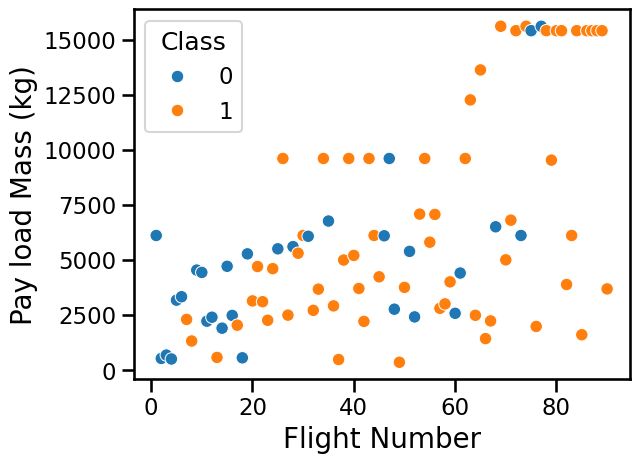

In [4]:
sns.set_context('talk')
sns.scatterplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

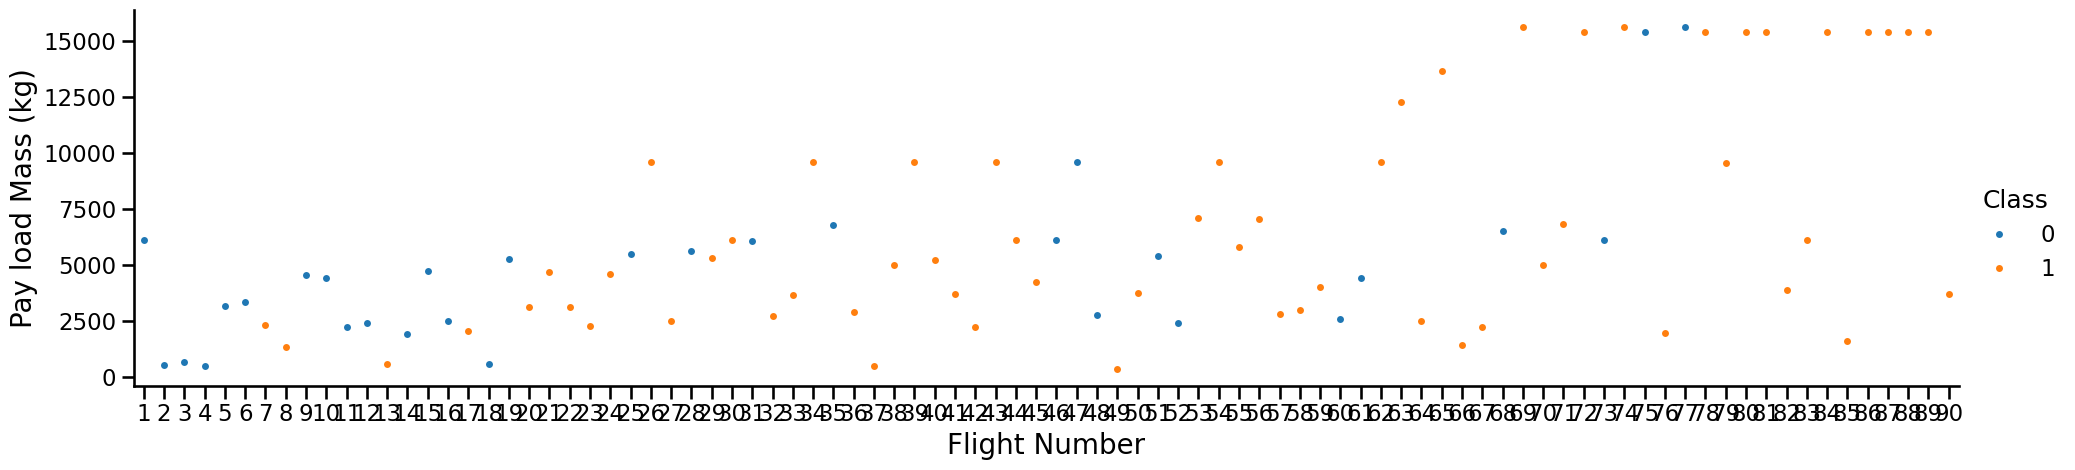

In [5]:

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


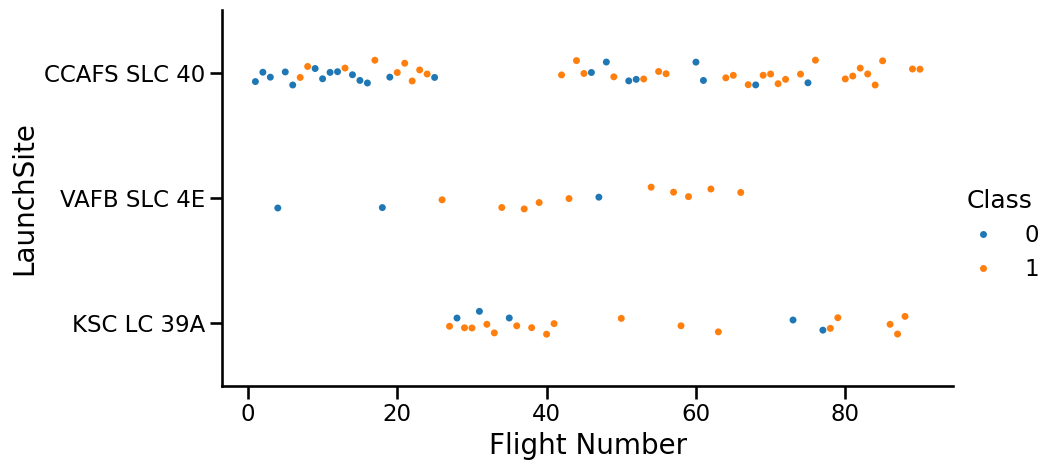

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x = 'FlightNumber', y = 'LaunchSite', hue = 'Class', data = df, aspect = 2)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

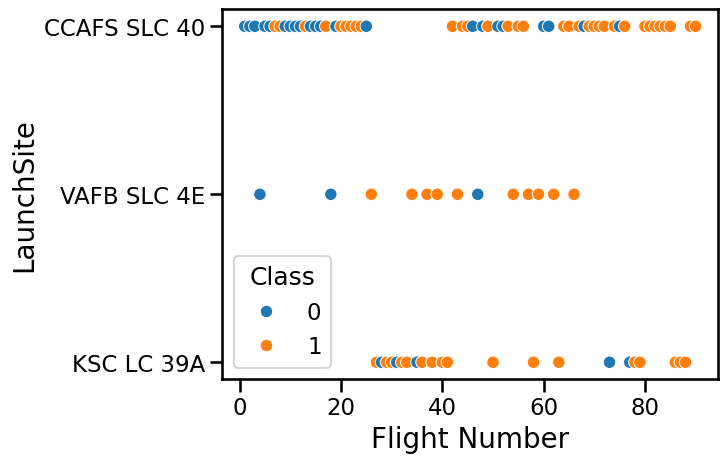

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.set_context('talk')
sns.scatterplot(x = 'FlightNumber', y = 'LaunchSite', hue = 'Class', data = df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


- Earlier flights had a lower success rate and later flights had a higher success rate.
- CCAFS SLC 40 launch site has about a half of all launches, while VAFB SLC 4E and KSC LC 39A launch sites have higher success rates.
- New launch seems has a higher success rate.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


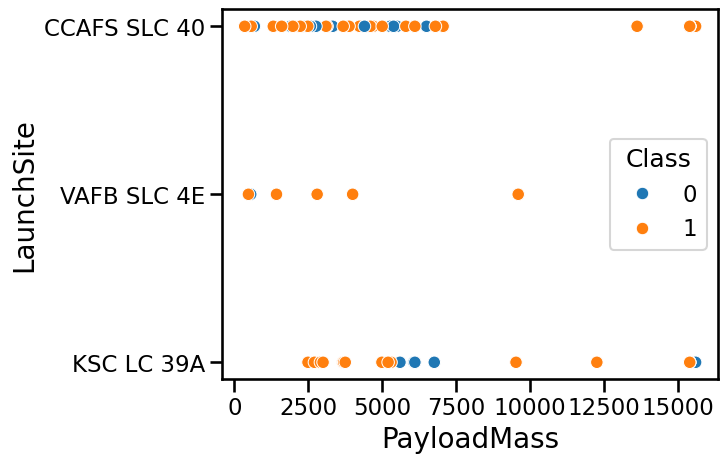

In [8]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.set_context('talk')
sns.scatterplot(x = 'PayloadMass', y = 'LaunchSite', hue = 'Class', data = df)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()



- Obviously, the higher the payload mass, the higher the success rate. 
- Most launces with a payload greater than 7,000 kg were successful.
- VAFB SLC 4E has a 100% success rate for launches when payload mass over 1,000 kg, while no over 10,000 Kg rockets launched at this site.
- KSC LC 39A has a 100% success rate for payload mass under 5500 kg too.



### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


Analyze the plotted bar chart to identify which orbits have the highest success rates.


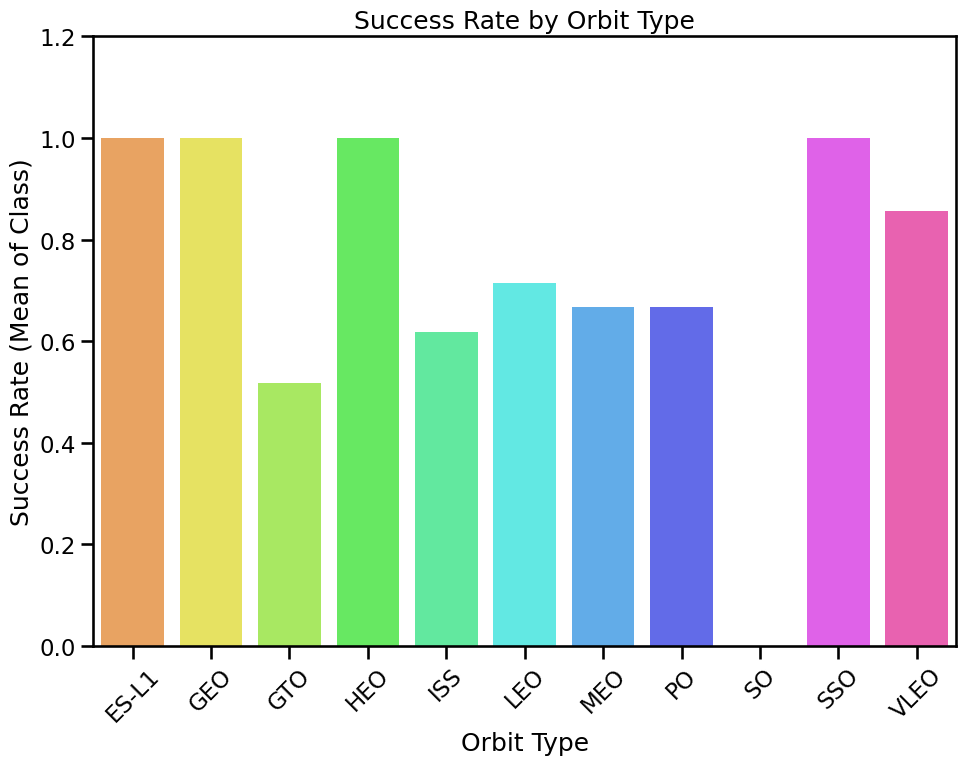

In [36]:

# Calculate success rate for each orbit
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Define a colorful palette (e.g., 'tab10', 'hsv', etc.)
palette = sns.color_palette("hsv", n_colors=len(orbit_success_rate))

# Plotting the success rate for each orbit type
plt.figure(figsize=(10, 8))
sns.barplot(x='Orbit', y='Class', hue = 'Orbit', data=orbit_success_rate, palette=palette, alpha = 0.7)

# Customize the chart
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate (Mean of Class)')
plt.xticks(rotation=45)
plt.ylim(0, 1.2)  # Set y-axis range from 0 to 1.2 for clarity

# Display the plot
plt.tight_layout()
plt.show()


- Orbits with 100% success rate: ES-L1, GEO, HEO, SSO 
- Orbits with 0% success rate: SO 
-  Orbits with success rate between 50% and 85%: GTO, ISS, LEO, MEO, PO

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


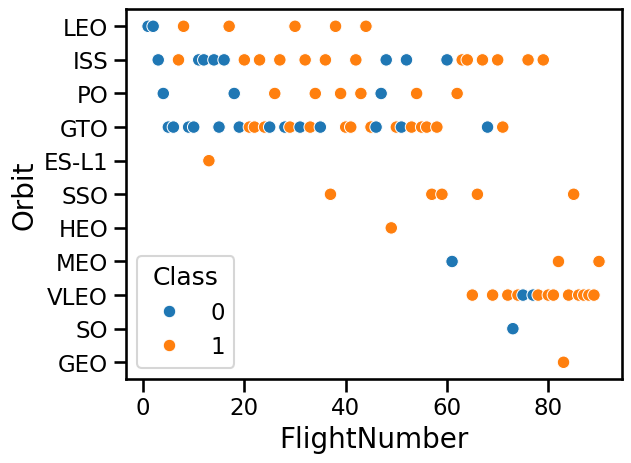

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

sns.set_context('talk')
sns.scatterplot(x = 'FlightNumber', y = 'Orbit', hue = 'Class', data = df)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


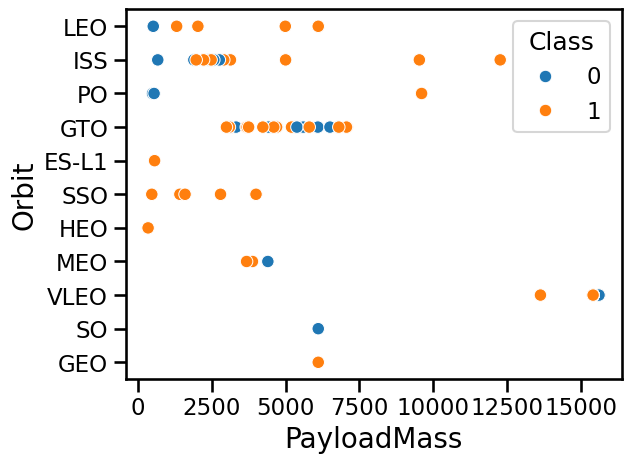

In [13]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

sns.set_context('talk')
sns.scatterplot(x = 'PayloadMass', y = 'Orbit', hue = 'Class', data = df)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar, LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [14]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [15]:
# get the success rate
df['Orbit_Success_Rate'] = df.groupby('Orbit')['Class'].transform('mean')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Orbit_Success_Rate
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0.714286
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0.714286
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0.619048
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0.666667
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0.518519


In [16]:
orbit_success_rate = df.groupby('Orbit')['Class'].mean()
orbit_success_rate

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

In [17]:
df.dtypes

FlightNumber            int64
Date                   object
BoosterVersion         object
PayloadMass           float64
Orbit                  object
LaunchSite             object
Outcome                object
Flights                 int64
GridFins                 bool
Reused                   bool
Legs                     bool
LandingPad             object
Block                 float64
ReusedCount             int64
Serial                 object
Longitude             float64
Latitude              float64
Class                   int64
Orbit_Success_Rate    float64
dtype: object

In [18]:
df['Date'].astype(int)

0     2010
1     2012
2     2013
3     2013
4     2013
      ... 
85    2020
86    2020
87    2020
88    2020
89    2020
Name: Date, Length: 90, dtype: int32

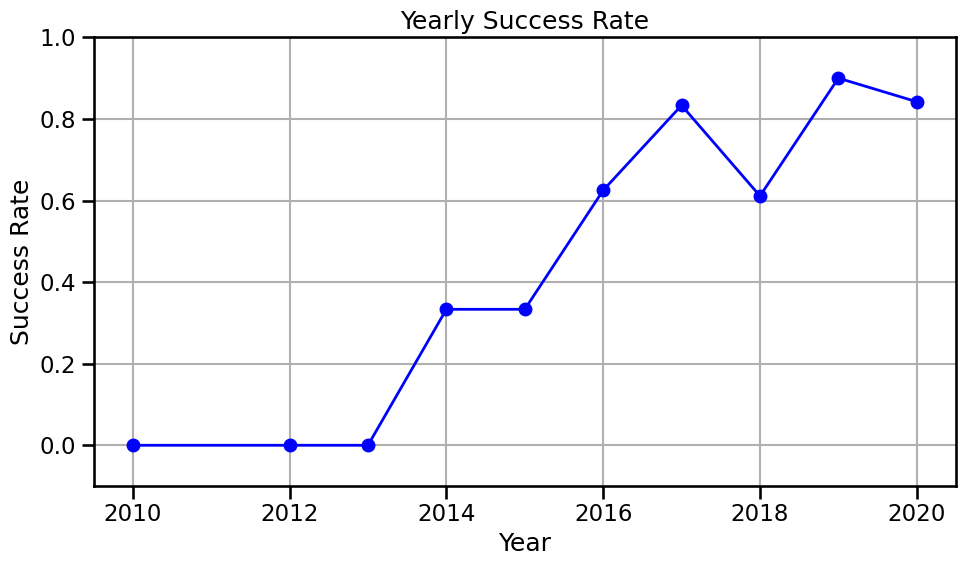

In [19]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


# Calculate success rate by year
# Assuming 'Class' column contains 1 for success and 0 for failure
yearly_success_rate = df.groupby('Year')['Class'].mean()

# Plotting the line chart for yearly success rate
plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', color='b', linestyle='-', linewidth=2)

# Customize the chart
plt.title('Yearly Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.ylim(-0.1, 1)  # Set y-axis range from 0 to 1 for clarity
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

you can observe that the success rate since 2013 kept increasing till 2020.


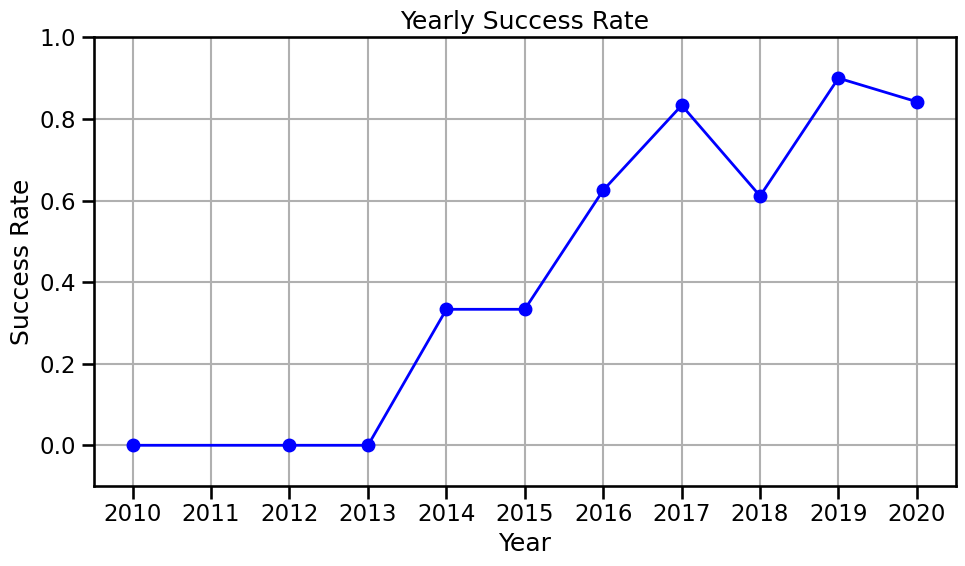

In [20]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate


# Calculate success rate by year
# Assuming 'Class' column contains 1 for success and 0 for failure
yearly_success_rate = df.groupby('Date')['Class'].mean()

# Plotting the line chart for yearly success rate
plt.figure(figsize=(10, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', color='b', linestyle='-', linewidth=2)

# Customize the chart
plt.title('Yearly Success Rate')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.ylim(-0.1, 1)  # Set y-axis range from 0 to 1 for clarity
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
df.dtypes

FlightNumber                   int64
Date                  datetime64[ns]
BoosterVersion                object
PayloadMass                  float64
Orbit                         object
LaunchSite                    object
Outcome                       object
Flights                        int64
GridFins                        bool
Reused                          bool
Legs                            bool
LandingPad                    object
Block                        float64
ReusedCount                    int64
Serial                        object
Longitude                    float64
Latitude                     float64
Class                          int64
Orbit_Success_Rate           float64
Year                           int32
dtype: object

## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [22]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [30]:
# HINT: Use get_dummies() function on the categorical columns

features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [40]:
# HINT: use astype function
features_one_hot.astype(float)
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15400.000000,6,True,True,True,5.0,5,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False


In [39]:
features_one_hot.dtypes.value_counts()

bool       75
int64       3
float64     2
Name: count, dtype: int64

In [41]:
# Identify boolean columns in the DataFrame
boolean_columns = features_one_hot.select_dtypes(include=[bool]).columns

# Convert boolean columns to integers (True -> 1, False -> 0)
features_one_hot[boolean_columns] = features_one_hot[boolean_columns].astype(float)

In [42]:
features_one_hot.dtypes.value_counts()

float64    77
int64       3
Name: count, dtype: int64

In [43]:
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,0.0,0.0,0.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,525.000000,1,0.0,0.0,0.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,677.000000,1,0.0,0.0,0.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,500.000000,1,0.0,0.0,0.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3170.000000,1,0.0,0.0,0.0,1.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,1.0,1.0,1.0,5.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87,15400.000000,3,1.0,1.0,1.0,5.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88,15400.000000,6,1.0,1.0,1.0,5.0,5,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89,15400.000000,3,1.0,1.0,1.0,5.0,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [44]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
